In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#Lo que viene en el dataset
# 150 instancias - 3 Clases de Iris - 50 Iris Setosa, 50 Iris Versicolor, 50 Iris Virginica
# 4 Atributos en cm - Largo del Sepalo, Ancho del Sepalo, Largo del Petalo, Ancho del Petalo 

data = load_iris()
#print(data)

In [2]:
#funciones Kmeans, GaussianMixture SpectralClustering
def clustering(X, cluster):
    ################################### Kmeans
    kmeans = KMeans(n_clusters=cluster).fit(X)
    result_kmeans = kmeans.labels_

    print('\nKmeans')
    print(result_kmeans)

    cMat = confusion_matrix(t, result_kmeans)
    print(cMat)

    accuracy = 0
    for l in cMat:
        m = max(l)
        accuracy += m
    print('Accuracy {}%'.format(accuracy/cant*100))


    ################################### GaussianMixture
    gnm = GaussianMixture(n_components=cluster).fit(X)
    result_gnm = gnm.predict(X)

    print('\nGaussian Mixture')
    print(result_gnm)

    cMat = confusion_matrix(t, result_gnm)
    print(cMat)

    accuracy = 0
    for l in cMat:
        m = max(l)
        accuracy += m
    print('Accuracy {}%'.format(accuracy/cant*100))


    ################################### SpectralClustering
    spectral = SpectralClustering(n_clusters=cluster).fit(X)
    result_spectral = spectral.labels_

    print('\nSpectral Clustering')
    print(result_spectral)

    cMat = confusion_matrix(t, result_spectral)
    print(cMat)

    accuracy = 0
    for l in cMat:
        m = max(l)
        accuracy += m
    print('Accuracy {}%'.format(accuracy/cant*100))
    
    ################################### Return results
    return result_kmeans, result_gnm, result_spectral

In [3]:
#funcion para dibujar los resultados 
def ploting(titles, result):
    fig, axes = plt.subplots(2, 2)
    for ax, i in zip(axes.flat, range(4)):
        for k in range(len(X)):
            ax.set_title(titles[i])
            if result[i][k] == 0:
                ax.plot(X[k,0], X[k,1], 'or')
            elif result[i][k] == 1: 
                ax.plot(X[k,0], X[k,1], 'ob')
            else:
                ax.plot(X[k,0], X[k,1], 'ok')

    fig.tight_layout()
    plt.show()

['setosa' 'versicolor']
Iris
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Kmeans
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
[[ 0 50]
 [45  5]]
Accuracy 95.0%

Gaussian Mixture
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[49  1]
 [ 0 50]]
Accuracy 99.0%

Spectral Clustering
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
[[ 0 50]
 [44  6]]
Accuracy 94.0%


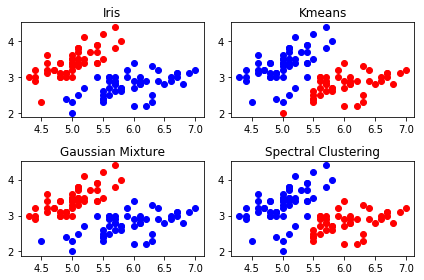

In [4]:
# 100 instancias - 2 Clases de Iris - 50 Iris Setosa, 50 Iris Versicolor
# 2 Atributos en cm - Largo del Sepalo, Ancho del Sepalo

cant = 100
cluster = 2

X = data['data']
X = X[:cant,:2]
t = data['target']
t = t[:cant]
target_names = data['target_names']
#print(X)
print(target_names[:cluster])
print('Iris')
print(t)


################################### Corriendo los algoritmos
result_kmeans, result_gnm, result_spectral = clustering(X, cluster)


################################### Ploteando
titles = ['Iris', 'Kmeans', 'Gaussian Mixture', 'Spectral Clustering']
result = [t, result_kmeans, result_gnm, result_spectral]
ploting(titles, result)

['setosa' 'versicolor']
Iris
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Kmeans
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[50  0]
 [ 0 50]]
Accuracy 100.0%

Gaussian Mixture
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[50  0]
 [ 0 50]]
Accuracy 100.0%

Spectral Clustering
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[ 0 50]
 [50  0]]
Accuracy 100.0%


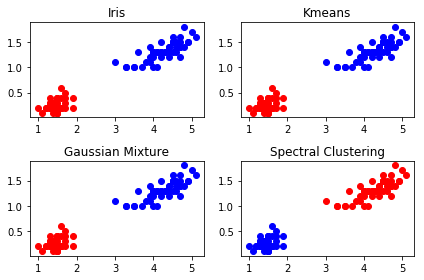

In [5]:
# 100 instancias - 2 Clases de Iris - 50 Iris Setosa, 50 Iris Versicolor
# 2 Atributos en cm - Largo del Petalo, Ancho del Petalo 

cant = 100
cluster = 2

X = data['data']
X = X[:cant,2:]
t = data['target']
t = t[:cant]
target_names = data['target_names']
#print(X)
print(target_names[:cluster])
print('Iris')
print(t)


################################### Corriendo los algoritmos
result_kmeans, result_gnm, result_spectral = clustering(X, cluster)


################################### Ploteando
titles = ['Iris', 'Kmeans', 'Gaussian Mixture', 'Spectral Clustering']
result = [t, result_kmeans, result_gnm, result_spectral]
ploting(titles, result)

In [5]:
# 100 instancias - 2 Clases de Iris - 50 Iris Setosa, 50 Iris Versicolor
# 4 Atributos en cm - Largo del Sepalo, Ancho del Sepalo, Largo del Petalo, Ancho del Petalo 

cant = 100
cluster = 2

X = data['data']
X = X[:cant,:]
t = data['target']
t = t[:cant]
target_names = data['target_names']
#print(X)
print(target_names[:cluster])
print('Iris')
print(t)


################################### Corriendo los algoritmos
result_kmeans, result_gnm, result_spectral = clustering(X, cluster)

['setosa' 'versicolor']
Iris
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Kmeans
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[ 0 50]
 [50  0]]
Accuracy 100.0%

Gaussian Mixture
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[50  0]
 [ 0 50]]
Accuracy 100.0%

Spectral Clustering
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[ 0 50]
 [50  0]]
Accuracy 100.0%


['setosa' 'versicolor' 'virginica']
Iris
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Kmeans
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 1 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
[[50  0  0]
 [ 0 12 38]
 [ 0 35 15]]
Accuracy 82.0%

Gaussian Mixture
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 0 2 2 2 2 2 2 2 2 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1
 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0

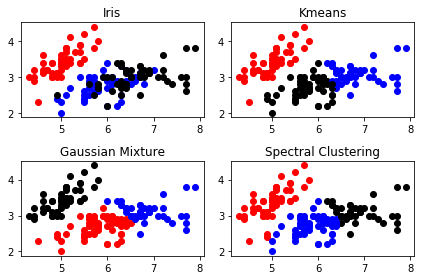

In [6]:
# 150 instancias - 3 Clases de Iris - 50 Iris Setosa, 50 Iris Versicolor, 50 Iris Virginica
# 2 Atributos en cm - Largo del Sepalo, Ancho del Sepalo

cant = 150
cluster = 3

X = data['data']
X = X[:cant,:2]
t = data['target']
t = t[:cant]
target_names = data['target_names']
#print(X)
print(target_names[:cluster])
print('Iris')
print(t)


################################### Corriendo los algoritmos
result_kmeans, result_gnm, result_spectral = clustering(X, cluster)


################################### Ploteando
titles = ['Iris', 'Kmeans', 'Gaussian Mixture', 'Spectral Clustering']
result = [t, result_kmeans, result_gnm, result_spectral]
ploting(titles, result)

['setosa' 'versicolor' 'virginica']
Iris
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Kmeans
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2]
[[ 0 50  0]
 [48  0  2]
 [ 6  0 44]]
Accuracy 94.66666666666667%

Gaussian Mixture
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 

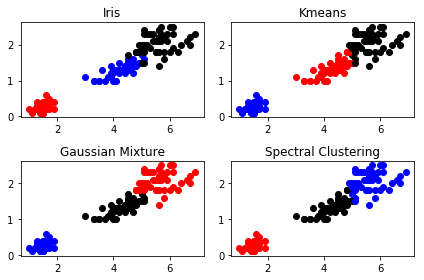

In [7]:
# 150 instancias - 3 Clases de Iris - 50 Iris Setosa, 50 Iris Versicolor, 50 Iris Virginica
# 2 Atributos en cm - Largo del Petalo, Ancho del Petalo 

cant = 150
cluster = 3

X = data['data']
X = X[:cant,2:]
t = data['target']
t = t[:cant]
target_names = data['target_names']
#print(X)
print(target_names[:cluster])
print('Iris')
print(t)


################################### Corriendo los algoritmos
result_kmeans, result_gnm, result_spectral = clustering(X, cluster)


################################### Ploteando
titles = ['Iris', 'Kmeans', 'Gaussian Mixture', 'Spectral Clustering']
result = [t, result_kmeans, result_gnm, result_spectral]
ploting(titles, result)

In [8]:
# 150 instancias - 3 Clases de Iris - 50 Iris Setosa, 50 Iris Versicolor, 50 Iris Virginica
# 4 Atributos en cm - Largo del Sepalo, Ancho del Sepalo, Largo del Petalo, Ancho del Petalo 

cant = 150
cluster = 3

X = data['data']
X = X[:cant,:]
t = data['target']
t = t[:cant]
target_names = data['target_names']
#print(X)
print(target_names[:cluster])
print('Iris')
print(t)


################################### Corriendo los algoritmos
result_kmeans, result_gnm, result_spectral = clustering(X, cluster)

['setosa' 'versicolor' 'virginica']
Iris
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Kmeans
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
Accuracy 89.33333333333333%

Gaussian Mixture
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 